<center><font size="6">Хакатон от Моторики</font>

[Первый этап](https://www.kaggle.com/competitions/motorica-gesture-classification-task/data)

Команда 1


# Import библиотек и описание функций

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# библиотеки машинного обучения
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# отображать по умолчанию длину дата Датафрейма
pd.set_option("display.max_rows", 9, "display.max_columns", 9)

# библиотека взаимодействия с интерпретатором

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
# import os

In [2]:
def data_preproc(df_data):
    "Функция преобразования выборки: разница показателей всех датчиков за"
    "первую и вторую половину времени активности по каждому объекту"
    
    sens_cols = []
    for i in range(df_data.shape[1]):
        sens_cols.append('sensor_' + str(i))

    
    df_feated = pd.DataFrame(columns=sens_cols)
    for i in range(df_data.shape[0]):
        sensors = pd.DataFrame(data=df_data[i], index=range(40), columns=range(60)).T
        df_feated.loc[i, sens_cols] = (sensors.iloc[30:].mean() - sensors.iloc[:30].mean()).values.reshape(-1) 
    
    return df_feated

def stratified_cross_valid(model, X_train, y_train, n, metric):
    "Функция оценки модели на кросс-валидации: вывод графика с результатами кросс-валидации,"
    "кривой достаточности данных и таблицы с результатами"
    
    cv_splitter = StratifiedKFold(n_splits = n)

    metric_table = pd.DataFrame()

    i = 0
                    
    cv_res = cross_validate(
        model, 
        X_train, 
        y_train, 
        scoring = metric, 
        n_jobs = -1, 
        cv = cv_splitter, 
        return_train_score = True, 
        verbose = 0)

    cv_train = cv_res['train_score'].mean()
    cv_test = cv_res['test_score'].mean()


    metric_table.loc[i, 'cv_train'] = cv_train
    metric_table.loc[i, 'cv_test'] = cv_test

                    
    metric_table['cv_dif'] = metric_table['cv_train'] - metric_table['cv_test']

    #результаты кросс-валидации
    fig = sns.pointplot(np.arange(n), cv_res['train_score'], color = 'r')
    fig = sns.pointplot(np.arange(n), cv_res['test_score'], color = 'g')
    fig.set_title('Результаты кросс-валидации', fontsize=16)
    fig.set_xlabel('Порядковый номер части совокупности')
    fig.set_ylabel('Показатель качества модели\n f-score')
    #plot.set_ylim(0.4, 1.1)
    fig.grid() # показать сетку
    plt.show()

    # кривая достаточности данных
    result = []

    s = len(X_train)
    p = len(X_train) // (n + 1)
    for i in np.arange(p, s - p + 1, p):
        model.fit(X_train.iloc[:i], y_train.iloc[:i])
        predict = model.predict(X_train.iloc[i:i+p])
        res = f1_score(y_train.iloc[i:i+p], predict,  average='macro')
        result.append(res)

    fig = sns.pointplot(np.arange(p, s - p + 1, p), result)
    fig.set_title('Кривая обучения', fontsize=16)
    fig.set_xlabel('Количество объектов для обучения')
    fig.set_ylabel('Показатель качества  модели\n f-score')
    fig.set_ylim(0.4, 1.05)
    fig.grid() # показать сетку
    plt.show()
    print ()

    display(metric_table.sort_values(by ='cv_test'))
    print ()

def show_activity (X_train, gesture_0, n):
    "Функция вывода примеров активности групп датчиков по жесту номер n"
    # Создадим пустой массив для списка индексов активных датчиков
    sensors_0_0, sensors_0_2, sensors_0_5, sensors_0_33 = [], [], [], []
    df_0_0  = pd.DataFrame(columns = sensors_0_0)
    df_0_2  = pd.DataFrame(columns = sensors_0_2)
    df_0_5  = pd.DataFrame(columns = sensors_0_5)
    df_0_33 = pd.DataFrame(columns = sensors_0_33)

    # цикл по наблюдениям жеста 0
    for i in gesture_0:
        df_0_[i] = pd.DataFrame(data = X_train[i], index=range(40)).T  # columns = range(60)
        # фильтруем датчик №0
        df1 = df_0_[i][0]
        df_0_0 = pd.concat([df_0_0, df1], axis=1)
    # объединим все датчики в датафрейм
    df_0_0.columns = list(map(lambda x: f'{x}-0', list([9, 10, 22, 36, 61, 96, 109, 114, 142, 148, 159])))
    sensors_0_0 = df_0_0

    # цикл по наблюдениям жеста 0
    for i in gesture_0:
        df_0_[i] = pd.DataFrame(data = X_train[i], index=range(40)).T  # columns = range(60)
        # фильтруем датчик №2
        df1 = df_0_[i][2]
        df_0_2 = pd.concat([df_0_2, df1], axis=1)
    # объединим все датчики в датафрейм
    df_0_2.columns = list(map(lambda x: f'{x}-2', list([9, 10, 22, 36, 61, 96, 109, 114, 142, 148, 159])))
    sensors_0_2 = df_0_2

    # цикл по наблюдениям жеста 0
    for i in gesture_0:
        df_0_[i] = pd.DataFrame(data = X_train[i], index=range(40)).T  # columns = range(60)
        # фильтруем датчик №5
        df1 = df_0_[i][5]
        df_0_5 = pd.concat([df_0_5, df1], axis=1)
    # объединим все датчики в датафрейм
    df_0_5.columns = list(map(lambda x: f'{x}-5', list([9, 10, 22, 36, 61, 96, 109, 114, 142, 148, 159])))
    sensors_0_5 = df_0_5

    # цикл по наблюдениям жеста 0
    for i in gesture_0:
        df_0_[i] = pd.DataFrame(data = X_train[i], index=range(40)).T  # columns = range(60)
        # фильтруем датчик №33
        df2 = df_0_[i][33]
        df_0_33 = pd.concat([df_0_33, df2], axis=1)
    df_0_33.columns = list(map(lambda x: f'{x}-33', list([9, 10, 22, 36, 61, 96, 109, 114, 142, 148, 159])))
    sensors_0_33 = df_0_33

    fig = make_subplots(
        rows=2, cols=2, subplot_titles=(
            "Рис. 6 - датчик 0 <br> ", "Рис. 7 - датчик 2  <br> ", 
            "Рис. 8 - датчик 5 <br> ", "Рис. 9 - датчик 33 <br> ",
            )
    )

    df_1 = sensors_0_0
    df_2 = sensors_0_2
    df_3 = sensors_0_5
    df_4 = sensors_0_33

    for i in df_1.columns: 
        fig.add_trace(go.Scatter(x=df_1.index, y=df_1[i]), row=1, col=1)

    for i in df_2.columns:
        fig.add_trace(go.Scatter(x=df_2.index, y=df_2[i]), row=1, col=2
    )

    for i in df_3.columns:
        fig.add_trace(go.Scatter(x=df_3.index, y=df_3[i]), row=2, col=1)
        
    for i in df_4.columns:
        fig.add_trace(go.Scatter(x=df_4.index, y=df_4[i]), row=2, col=2
    )
    fig.update_layout(height=800, width=1000, #yaxis_type='log', 
                    title_text="Показания датчиков в наблюдениях жеста " + str(n) , title_xanchor='left', title_font=dict(size = 22),
                    xaxis_title_text  = 'Время', yaxis_title_text  = 'Сигнал датчикачика', yaxis_range =[500 ,2500], 
                    xaxis2_title_text = 'Время', yaxis2_title_text = 'Сигнал датчикачика', yaxis2_range=[500 ,2500], 
                    xaxis3_title_text = 'Время', yaxis3_title_text = 'Сигнал датчикачика', yaxis3_range=[500 ,2500], 
                    xaxis4_title_text = 'Время', yaxis4_title_text = 'Сигнал датчикачика', yaxis4_range=[1000,1500], 
                    showlegend=False # легенда загромождает картинку
    )

    fig.show()

# Условие задачи, загрузка и описание данных 

Задача: мультиклассовая классификация “распознавания жестов”.  
Построить классификационную модель, которая по показаниям от датчиков будет определять жест, выполненный пользователем протеза во время записи данных, что отражено в значении целевой переменной.

* X_train.npy - обучающая выборка имеющая размерности "наблюдения, датчики, время"
* X_test.npy - тестоваая выборка имеющая размерности "наблюдения, датчики, время"
* y_train.npy - целевая переменная для обучающей выборки, которая содержит следующие классы:

| Номер <br> класса | Описание |
| :---: | :--- |
| "0"  |  разгиб жеста "grab" |
| "1"  |  разгиб жеста "ok" |
| "2"  |  разгиб большого пальца |
| "3"  |  разгиб указательного пальца |
| "4"  |  разгиб жеста "пистолет" |
| "5"  |  разгиб среднего пальца |
| "6"  |  разгиб безымянного пальца |
| "7"  |  разгиб мизинца |
| "8"  |  сгиб мизинца |
| "9"  |  сгиб безымянного пальца |
| "10" |  сгиб среднего пальца |
| "11" |  сгиб жеста "пистолет" |
| "12" |  сгиб указательного пальца |
| "13" |  сгиб большого пальца |
| "14" |  сгиб жеста "ok" |
| "15" |  сгиб жеста "grab" |

In [3]:
#загрузка обучающей выборки и меток классов
X_train = np.load('X_train.npy')
y_train = pd.read_csv('y_train.csv', index_col='Id').reset_index(drop = True)

#загрузка тестовой выборки
X_test = np.load('X_test.npy')

print(f"Размерность файла 'X_train': {X_train.shape}. Размерность: наблюдения, датчики, время")
print(f"Размерность файла 'y_train': {y_train.shape}")

Размерность файла 'X_train': (165, 40, 60). Размерность: наблюдения, датчики, время
Размерность файла 'y_train': (165, 1)


In [4]:
y_train.head()

,Class
0,5
1,8
2,11
3,9
4,14


Text(0, 0.5, 'Количество классов')

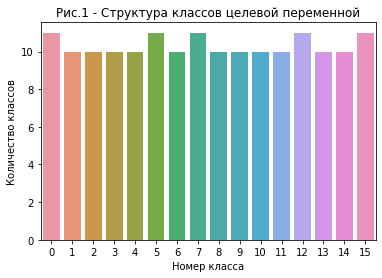

In [5]:
class_vc = y_train.Class.value_counts()
plot = sns.barplot(data = y_train, x = class_vc.index, y = class_vc)
plot.set_title('Рис.1 - Структура классов целевой переменной')
plot.set_xlabel('Номер класса')
plot.set_ylabel('Количество классов')

Классы сбалансированны.  
Отметитм малое количество объектов каждого класса: по 10-11 объектов на каждый класс.

In [6]:
# посмотрим на пример описания объекта: данные показателей сорока датчиков по 60ти временным отметкам

i = 0 #индекс объекта

pd.DataFrame(
    data = X_train[i], 
    index = [f'sensor_{s}' for s in range(X_train.shape[1])], 
    columns = [f'time_{s}' for s in range(X_train.shape[2])]
    )

,time_0,time_1,time_2,time_3,...,time_56,time_57,time_58,time_59
sensor_0,1331.0,1333.0,1331.0,1332.0,...,833.0,838.0,842.0,848.0
sensor_1,17.0,11.0,14.0,9.0,...,8.0,4.0,4.0,10.0
sensor_2,2580.0,2583.0,2581.0,2585.0,...,772.0,767.0,760.0,762.0
sensor_3,22.0,19.0,22.0,26.0,...,15.0,12.0,13.0,16.0
...,...,...,...,...,...,...,...,...,...
sensor_36,1730.0,1730.0,1731.0,1730.0,...,1924.0,1924.0,1928.0,1928.0
sensor_37,22.0,23.0,25.0,26.0,...,17.0,22.0,30.0,22.0
sensor_38,305.0,311.0,304.0,304.0,...,345.0,342.0,339.0,337.0
sensor_39,24.0,21.0,24.0,23.0,...,21.0,22.0,20.0,26.0


# Погружение в задачу

Для улучшения функционала бионических кистевых протезов была предложена задача «распознавания жестов» на основании данных оптомиографических датчиков.
    
Оптомиография (ОМГ) - молодой метод мониторинга мышечной активности, был предложен всего лишь в 2015 году. За время исследований ОМГ показала превосходное соотношение сигнал/шум и повышенную устойчивость к внешним мешающим факторам по сравнению с данными электромиографии и механомиографии.  Основной принцип ОМГ заключается в использовании активных оптических датчиков ближнего инфракрасного диапазона для измерения вариаций измеряемых сигналов, которые отражаются от поверхности кожи, при одновременной активации мышц ниже и вокруг участка кожи, на который фокусируется фотоэлектрический датчик. Каждый сигнал OMГ считывается в определенном месте на поверхности кожи путем фокусировки непрерывного маломощного ближнего инфракрасного (NIR) луча на этом участке кожи и измерения отраженных сигналов в течение определенного периода времени. Интенсивность обнаруженного сигнала зависит как от расстояния, так и от наклона поверхности кожи по отношению к направлению датчика и испускаемого NIR-луча, а также от характеристик подкожных мягких тканей (жировая клетчатка и мышечные структуры).

Принцип работы заключается в том, что световой поток от источника NIR фокусируется на поверхности кожи. При этом свет частично отражается обратно и детектируется фототранзистором, а также частично рассеивается в мягких тканях (Рис. 2).

<center> <img src = "pic_1.jpg" width=300, height=250>

**Рис.2 - Детектирование расслабления мышцы \
с помощью оптомиографического датчика**

Когда мышца сокращается, степень рассеивания пучка уменьшается, тем самым плотность отраженного света увеличивается (рис. 3), что приводит к увеличению тока и напряжения в детекторе. 

<center> <img src = "pic_2.jpg" width=300, height=250>

**Рис.3 - Детектирование напряжения мышцы \
с помощью оптомиографического датчика** 

                      

Когда рука находится в состоянии покоя, изменений отражающей способности кожи не регистрируется, поэтому на выходе фототранзистора регистрируется постоянное значение напряжения. При возникновении движения происходит изменение параметров среды для прохождения светового пучка, следовательно изменяется количество света, попадающего на детектор. Важно понимать, что чем сильнее было изменение среды (а наиболее вероятно это связано именно с мышечным сокращением), тем больше будет разница первоначальных и конечных показаний датчиков. 

На основании этих данных перейдем непосредственно к анализу данных и решению задачи. 

# Aнализ жестов и показателей датчиков

## Aнализ "разгиб жеста grab"

Выполним анализ класса 0 (жест "grab"), чтобы ближе познакомиться с данными.

In [7]:
gesture_0 = y_train[y_train['Class'] == 0].index
print(f"Индексы наблюдения жеста 0: {', '.join(gesture_0.astype(str))}")
print(f"Количетсво жестов 0 в обучающей выборке: {len(gesture_0)}")

Индексы наблюдения жеста 0: 9, 10, 22, 36, 61, 96, 109, 114, 142, 148, 159
Количетсво жестов 0 в обучающей выборке: 11


В качестве примера рассмотрим наблюдение 9 жеста 0. Отобразим показания датчиков на диаграмме

In [8]:
df_0_ = {}
for i in gesture_0:
    df_0_[i] = pd.DataFrame(data = X_train[i], index = range(40), columns = range(60)).T

# Линейная диаграмма
fig_1 = px.line(
    data_frame=df_0_[9],   
)

fig_1.update_layout(
    title=dict(text='Рис. 4 - показатели датчиков <br> жеста 0 наблюдения 9', x=.5, xanchor='center'),
    xaxis_title_text = 'Время', yaxis_title_text = 'Сигнал датчикачика',
    legend_title_text= 'Номер датчика',
    width=600, height=400,
)

fig_1.add_hrect(
    y0="0", y1="200",
    fillcolor="yellow", opacity=0.5,
    layer="below", line_width=0,
)

fig_1.show();

# """
# # сохраним результат в папку figures.
# with open('/content/drive/MyDrive/Motorika/figures/fig_1.png', 'w') as f:
#   f.write('fig_1')
# """;

Отметим, что датчики можно условно разделить на 2 группы по их амплитуде их показний на: 
- активные  (0, 2, 5, 8, 12, 15, 17, 19, 21, 24, 27, 29, 30, 33, 36, 38). Их величина превышает 200;
- спящие (все остальные), величина менее 200.

Посмотрим на них раздельно.

In [9]:
# Создадим список индексов активных датчиков, чьи средние показания превышают порог в 200 единиц.
active_sensors_0_9, passive_sensors_0_9  = list(), list()

# Цикл поиска по графам-датчикам
for sensor in df_0_[9].columns:
    if df_0_[9][sensor].mean() > 200:
        active_sensors_0_9.append(sensor)
    else:
        passive_sensors_0_9.append(sensor)
        
print(f"Активные датчики жеста 0 наблюдения 9: {active_sensors_0_9}")
print(f"Пассивные датчики: {passive_sensors_0_9}")

Активные датчики жеста 0 наблюдения 9: [0, 2, 5, 8, 12, 15, 17, 19, 21, 24, 27, 29, 30, 33, 36, 38]
Пассивные датчики: [1, 3, 4, 6, 7, 9, 10, 11, 13, 14, 16, 18, 20, 22, 23, 25, 26, 28, 31, 32, 34, 35, 37, 39]


In [10]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Рис. 5 - Активные датчики <br> жеста 0 наблюдения 9", 
                                    "Рис. 6 - Пассивные датчики <br> жеста 0 наблюдения 9"))
df = df_0_[9][active_sensors_0_9]
df_1 = df_0_[9][passive_sensors_0_9]

for i in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[i]),
    row=1, col=1
)

for j in df_1.columns:
    fig.add_trace(go.Scatter(x=df_1.index, y=df_1[j]),
    row=1, col=2
)

fig.update_layout(width=1000, height=400, legend_title_text ='Номер датчика',
                  xaxis_title_text  = 'Время', yaxis_title_text  = 'Сигнал датчикачика', yaxis_range = [0, 3500],
                  xaxis2_title_text = 'Время', yaxis2_title_text = 'Сигнал датчикачика', yaxis2_range= [0,  200]
)

fig.show()

На Рис.2 представлены показания активных датчиков наблюдения 0-9, а на рис.3 - пассивных датчиков. Рассматривая динамику показаний активных датчиков во времени условно отметим 3 периода:
*  0 - 35 с. - "покой" и слабого изменения;
* 35 - 45 с. - "сильное колебание" показаний при движении;
* 45 - 60 с. - "стабилизаця" после движения.
Показания пассивных датчиков колеблются с низкой амплитудой 

В результате анализа наблюдения 0-9 "разгиб жеста "grab" установлено, что датчики можно условно разделить: 
- по амплитуде сигнала на 2 группы: активные и пассивные,
- по изменению во времени на 3 группы: "покой", "сильное колебание" и "стабилизация".

Проверим активность датчиков у жеста-антагониста №15 "сгиб жеста "grab".

## Анализ антагониста "сгиб жеста "grab"

In [11]:
gesture_15 = y_train[y_train['Class'] == 15].index
print(f"Индексы наблюдения жеста 15: {', '.join(gesture_15.astype(str))}")
print(f"Количетсво жестов 15 в обучающей выборке: {len(gesture_15)}")

Индексы наблюдения жеста 15: 21, 26, 29, 40, 54, 76, 81, 90, 116, 157, 163
Количетсво жестов 15 в обучающей выборке: 11


Исследуем произвольно выбранное наблюдение 21.

In [12]:
df_15_= {}
for i in gesture_15:
    df_15_[i] = pd.DataFrame(data = X_train[i], index = range(40), columns = range(60)).T

# Создадим список индексов активных датчиков, чьи средние показания превышают порог в 200 единиц.
active_sensors_15_21 = list()

# Цикл поиска по графам-датчикам
for sensor in df_15_[21].columns:
    if df_15_[21][sensor].mean() > 200:
        active_sensors_15_21.append(sensor)
        
print(f"Активные датчики жеста 15 наблюдения 21: {active_sensors_15_21}")

Активные датчики жеста 15 наблюдения 21: [0, 2, 5, 8, 12, 15, 17, 19, 21, 24, 27, 29, 30, 33, 36, 38]


Построим диаграмму сигналов

In [13]:
# Линейная диаграмма
df = df_15_[21]
df_active = df_15_[21][active_sensors_15_21]

fig = px.line(
    data_frame=df,
    x=df.index,
    y=df.columns
)

fig.update_layout(
    title=dict(text='Рис. 7 - показатели датчиков <br> жеста 15 наблюдения 21', x=.5, xanchor='center'),
    xaxis_title_text = 'Время',
    yaxis_title_text = 'Сигнал датчика',
    legend_title_text ='Номер датчика',
    width=600, height=400, 
)

fig.add_hrect(
    y0="0", y1="200",
    fillcolor="yellow", opacity=0.5,
    layer="below", line_width=0,
)
fig.show();   
#fig.write_image('figures/fig.png')

## Анализ активности датчиков

### a) при выполнении различных жестов

Выясним какие датчики активны при исполнении жестов-антагонистов.  
Сравним показания активных датчиков с одинаковыми индексами в ходе выполнения  жестов:
* 0  - разгиб жеста "grab"
* 15 - сгиб жеста "grab"

In [14]:
# пустые списки для активных и пассивных датчиков
active_sensors_0   = list()
active_sensors_15  = list()
passive_sensors_0  = list()
passive_sensors_15 = list()

# Цикл по наблюдениям
for i in gesture_0:
  #print(i)
  # Цикл поиска по графам-датчикам
  for sensor in df_0_[i].columns:
    if df_0_[i][sensor].mean() > 200:
      active_sensors_0.append(sensor)
    else:
      passive_sensors_0.append(sensor)

for j in gesture_15:
  # Цикл поиска по графам-датчикам
  for sensor in df_15_[j].columns:
    if df_15_[j][sensor].mean() > 200:
      active_sensors_15.append(sensor)
    else:
      passive_sensors_15.append(sensor)

active_sensors_0 = pd.DataFrame({'Жест_0':active_sensors_0})
active_sensors_15 = pd.DataFrame({'Жест_15':active_sensors_15})
active_sensors_0_15 = active_sensors_0.join(active_sensors_15)

if list(active_sensors_0['Жест_0']) == list(active_sensors_15['Жест_15']):
  print("Да, массивы одинаковые") 
  display(active_sensors_0_15.head())
else: 
  print("no")

Да, массивы одинаковые


,Жест_0,Жест_15
0,0,0
1,2,2
2,5,5
3,8,8
4,12,12


В результате анализа установлено, что при жестах-антагонистах 15 и 0 наблюдается активность одинаковых датчиков во всех наблюдениях: 0, 2, 5, 8, 12, 15, 17, 19, 21, 24, 27, 29, 30, 33, 36, 38. Остальные датчики неактивны. 

### b) при выполнении одного жеста

Выберем произвольно 4 датчика: 0, 2, 5, 33, а затем рассмотрим на диаграммах их активность во всех наблюдениях жестов 0 и 15

In [15]:
show_activity (X_train, gesture_0, 0)

In [16]:
show_activity (X_train, gesture_15, 15)

На диаграммах рис.6, 7, 8, 9 можно увидеть, что показания датчиков изменяются во времени с разной амплитудой. Амплитуда сигналов датчиков 0, 2, 5 сильнее, чем у датчика 33. Однако, изменения показаний у датчиков в разных наблюдениях одного жеста в среднем имеют одинаковый периодический характер: 
*  0 - 35 с. - "покой" и слабого изменения;
* 35 - 45 с. - "сильное колебание" показаний при движении;
* 45 - 60 с. - "стабилизаця" после движения.

Можно провести подобный анализ для других жестов и датчиков и сделать вывод, что распределение на активные и пассивные датчики сохраняется в остальных жестах.

# Построение модели

## Предлагаемое решение

На основании проведённого анализа предполагаем, что классы можно успешно разлелить по перепаду показателей датчиков до и после исполнения жестов.

Выберем логистическую регрессию в качестве предиктора. Это позволит нам как успешно решить задачу, так и выиграть в скорости обучения и предсказания по сравнению с более затратными ансамблевыми методами. 

Учитывая состояние "покоя" и периоды активности и фиксации показателей датчиков, в качестве признаков возьмём разность средних значений в первые 30 временных единиц и во вторые 30 временных единиц по каждому датчику для каждого объекта. Такое преобразование изменит размерность обучающей выборки из (165, 40, 60) в (165, 40), что сэкономит время на обучение и сохранит информативность.

Учитывая возможность того, что часть датчиков будет неинформативной или будет обладать избыточной информацией для модели, воспользуемся L1 регуляризацией для зануления коэфициентов модели для таких датчиков.

При необходимости воспользуемся подбором гиперпараметров.

## Преобразование данных

Преобразуем данные в соответствии с предложенным решением.  
В качестве признаков возьмём разность средних значений в первые 30 временных единиц и во вторые 30 временных единиц по каждому датчику для каждого объекта.

In [17]:
X_train_preproc = data_preproc(X_train)
X_train_preproc

,sensor_0,sensor_1,sensor_2,sensor_3,...,sensor_36,sensor_37,sensor_38,sensor_39
0,-315.966667,0.533333,-1074.6,-4.933333,...,129.466667,-1.633333,39.233333,0.733333
1,99.166667,0.7,181.366667,10.566667,...,-43.366667,1.433333,5.766667,2.366667
2,247.2,0.1,354.3,4.233333,...,-169.566667,0.9,-15.2,2.066667
3,-173.266667,0.066667,302.666667,1.233333,...,-152.533333,1.333333,41.833333,1.833333
...,...,...,...,...,...,...,...,...,...
161,23.533333,-0.433333,855.666667,4.033333,...,-120.133333,-1.566667,-40.666667,0.3
162,1.4,-0.366667,82.5,-1.633333,...,125.066667,2.333333,-99.333333,-0.7
163,295.3,1.466667,470.2,12.766667,...,-162.666667,1.366667,177.166667,2.333333
164,-31.0,1.5,-115.033333,1.366667,...,44.933333,0.333333,-144.233333,-0.266667


In [18]:
X_test_preproc = data_preproc(X_test)
X_test_preproc

,sensor_0,sensor_1,sensor_2,sensor_3,...,sensor_36,sensor_37,sensor_38,sensor_39
0,96.833333,0.366667,634.533333,0.033333,...,-162.166667,0.2,-30.4,0.166667
1,0.233333,1.533333,86.066667,-9.666667,...,96.466667,0.2,-225.933333,-1.533333
2,160.6,-0.633333,1059.666667,2.366667,...,-194.2,-1.666667,-40.2,0.7
3,51.966667,0.566667,83.366667,0.0,...,41.333333,0.1,240.8,0.433333
...,...,...,...,...,...,...,...,...,...
162,19.2,-0.066667,101.766667,-0.933333,...,6.933333,-1.833333,121.9,0.133333
163,238.3,-4.3,345.333333,2.433333,...,58.433333,-1.0,-174.333333,1.4
164,-179.533333,0.566667,194.633333,-0.933333,...,-96.766667,0.333333,39.666667,1.0
165,163.9,-0.233333,-293.033333,-1.866667,...,173.533333,-4.066667,-51.4,-2.4


## Тестирование и выбор модели

### Log

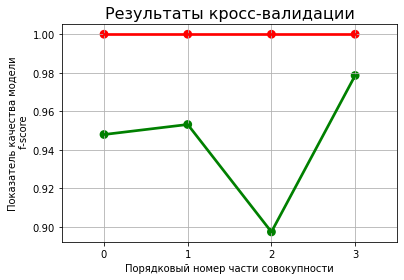

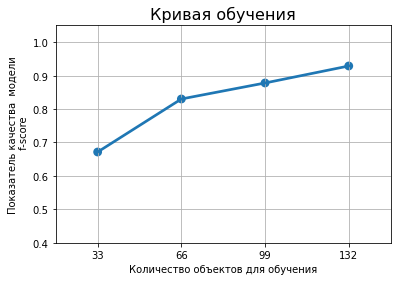

,cv_train,cv_test,cv_dif
0,1.0,0.944234,0.055766


In [19]:
cl = LogisticRegression()
stratified_cross_valid(cl, X_train_preproc, y_train, 4, 'f1_macro')
#plot.set_title('Рис.12 - Качество предсказания модели')
#plot.set_title('Рис.13 - Кривая достаточости данных')

### LogL1 (отбрасываем часть датчиков)

Применим L1 регуляризацию для отбрасывания части неинформативных (или избыточных) датчиков.

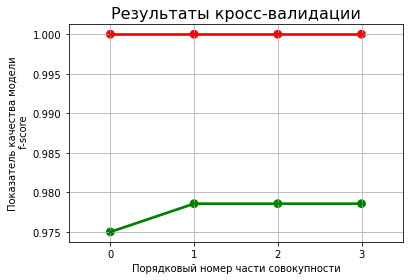

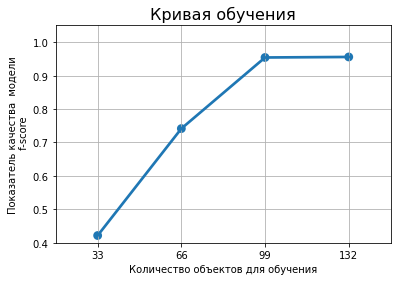

,cv_train,cv_test,cv_dif
0,1.0,0.977679,0.022321


In [20]:
cl = LogisticRegression(solver = 'liblinear', penalty = 'l1')
stratified_cross_valid(cl, X_train_preproc, y_train, 4, 'f1_macro')
#plot.set_title('Рис.14 - Качество предсказания модели')
#plot.set_title('Рис.15 - Кривая достаточости данных')

Модель в достаточной степени справляется с поставленной задачей и при увеличении количества объектов повышает свою эффективность.
На данном этапе подбирать гиперпараметры и подстраиваться под малое количество объектов не оправданно, поэтому мы принимаем данную модель без перебора коэффициента регуляризации.

In [21]:
cl = LogisticRegression(solver = 'liblinear', penalty = 'l1')
cl.fit(X_train_preproc, y_train)
imp = pd.Series (data = cl.coef_[0], index = X_train_preproc.columns)

print('Модель считает данные датчики бесполезными или избыточными для предсказаний:', ', '.join(np.abs(imp)[np.abs(imp) == 0].index))
print('Модель считает данные датчики полезными или достаточными для предсказаний:', ', '.join(np.abs(imp)[np.abs(imp) > 0].index))

Модель считает данные датчики бесполезными или избыточными для предсказаний: sensor_1, sensor_3, sensor_4, sensor_6, sensor_7, sensor_9, sensor_10, sensor_11, sensor_13, sensor_14, sensor_16, sensor_18, sensor_20, sensor_22, sensor_23, sensor_25, sensor_26, sensor_28, sensor_31, sensor_32, sensor_33, sensor_34, sensor_35, sensor_37, sensor_39
Модель считает данные датчики полезными или достаточными для предсказаний: sensor_0, sensor_2, sensor_5, sensor_8, sensor_12, sensor_15, sensor_17, sensor_19, sensor_21, sensor_24, sensor_27, sensor_29, sensor_30, sensor_36, sensor_38


Модель занулила коэфициенты всех "пассивных" датчиков, которые мы выделили в разведочном анализе.

# Submition

In [22]:
cl = LogisticRegression(solver = 'liblinear', penalty = 'l1')
cl.fit(X_train_preproc, y_train)
sub_predict = cl.predict(X_test_preproc)

In [23]:
sub_predict

array([10,  1, 10, 13,  4,  5, 15,  7,  3, 13,  2,  3,  5,  8, 12,  7,  0,
       11, 12,  4, 12, 14,  4, 10,  0, 10, 15,  5,  6,  4, 15,  1,  2, 15,
       12, 12,  9,  8, 14,  2, 12,  3,  8, 14,  3,  8, 13, 13,  7, 10,  4,
        1,  1, 13, 11, 13, 12,  0,  6,  2,  1,  6, 11,  3,  6,  3,  5, 11,
       13,  5, 14,  2,  7, 15, 15,  4,  2,  6,  0,  7,  8,  5,  9, 11,  1,
        5, 15,  8,  8, 14, 14,  1,  2, 11,  9,  1,  5, 14,  3,  9,  5,  2,
       10, 15,  9,  7, 10, 10,  4,  9,  6, 14,  6, 12,  0, 11,  2,  8,  3,
       11, 13,  7, 10, 10, 11,  5,  6,  0,  9, 10, 12,  8,  0,  8,  7,  3,
       12,  4,  9, 15,  2,  4,  4,  7,  6,  6,  1,  9,  3, 11, 13,  8, 12,
        0,  7,  2,  1,  0, 15,  0,  9, 13, 13,  3,  9,  6], dtype=int64)

In [24]:
submission = pd.read_csv('sample_submission.csv')
submission['Class'] = sub_predict

In [25]:
# submission.to_csv('submission_3.csv', index = False)

Скор = 1.0 на LB

# Заключение

Командой построена модель ML для решения задачи мультиклассовой классификации «распознавания жестов».  
На этапе анализа данных приняты следующие гипотезы:
- для распознавания жеста достаточно информации о разности между состоянием датчиков до и после исполнения жеста,
- в качестве предиктора достаточно использовать логистическую регрессию с L1 регуляризацией  

Проверка полученного решения на кросс-валидации показала хорошую обучаемость модели, которая растет с увеличением количества объектов и должна показать хорошую эффективность и на всей обучающей выборке.

При относительной простоте самой модели и предобработке данных модель не требует усложения дополнительным фиче-инжинирингом и обеспечивает быструю и качественную классификацию заданных объектов, т.е. успешно справляется с поставленной задачей.